In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
faces = fetch_olivetti_faces()

In [5]:
train_X , test_X , train_y, test_y = train_test_split(faces.images,faces.target,test_size=0.4,random_state=0)

In [7]:
train_X = train_X[:,:,:,np.newaxis]
test_X = test_X[:,:,:,np.newaxis]

In [8]:
train_y = np_utils.to_categorical(train_y,40)
test_y = np_utils.to_categorical(test_y,40)

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import *

np.random.seed(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta, SGD
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(20, (4, 4), activation='relu', input_shape=(64, 64, 1), padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(50, (4, 4), activation='relu', padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer="glorot_uniform"))
modbel.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=RMSprop())

In [10]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
__________

In [12]:
hist1 = model.fit(train_X, train_y, epochs=20, batch_size=120, validation_data=(test_X, test_y), verbose=2)


Train on 240 samples, validate on 160 samples
Epoch 1/20
 - 1s - loss: 4.3695 - acc: 0.0125 - val_loss: 3.8257 - val_acc: 0.0125
Epoch 2/20
 - 1s - loss: 3.8620 - acc: 0.0292 - val_loss: 3.6873 - val_acc: 0.0375
Epoch 3/20
 - 1s - loss: 3.6595 - acc: 0.0625 - val_loss: 3.6861 - val_acc: 0.0813
Epoch 4/20
 - 1s - loss: 3.6153 - acc: 0.1167 - val_loss: 3.6731 - val_acc: 0.0813
Epoch 5/20
 - 1s - loss: 3.5858 - acc: 0.0958 - val_loss: 3.6505 - val_acc: 0.0625
Epoch 6/20
 - 1s - loss: 3.4896 - acc: 0.1083 - val_loss: 3.6083 - val_acc: 0.0625
Epoch 7/20
 - 1s - loss: 3.3914 - acc: 0.0917 - val_loss: 3.5313 - val_acc: 0.1188
Epoch 8/20
 - 1s - loss: 3.2945 - acc: 0.2042 - val_loss: 3.4057 - val_acc: 0.1500
Epoch 9/20
 - 1s - loss: 3.1785 - acc: 0.2958 - val_loss: 3.4654 - val_acc: 0.0438
Epoch 10/20
 - 1s - loss: 3.1325 - acc: 0.1875 - val_loss: 3.1285 - val_acc: 0.3188
Epoch 11/20
 - 1s - loss: 2.7612 - acc: 0.4125 - val_loss: 3.0551 - val_acc: 0.3250
Epoch 12/20
 - 1s - loss: 2.8848 - acc:

## Image Augmentation

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_generator = ImageDataGenerator(
 zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [16]:
train_generator.fit(train_X)
batch_size=8

In [17]:
iterator = train_generator.flow(train_X[:batch_size], train_y[:batch_size], batch_size=batch_size)


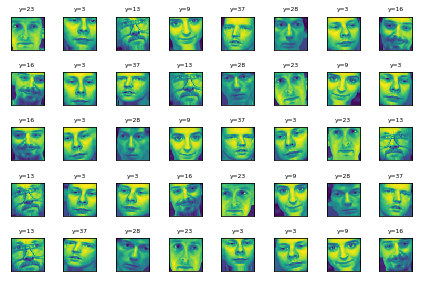

In [18]:
np.random.seed(0)
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :, 0])
        plt.title("y={}".format(np.argmax(y_augs[j, :])), fontsize=6)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

In [19]:
test_generator = ImageDataGenerator()


In [ ]:
train_iterator = train_generator.flow(train_X,train_y, batch_size=len(train))

N = 50
X_train_new = []
Y_train_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)